## Homework - Sakunova Anastasia, Zlobina Svetlana - notebook2

In [89]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from kmodes.kmodes import KModes
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [3]:
df = pd.read_csv("stack-overflow-developer-survey-results-2019/survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [ ]:
df.info

In [7]:
df_info = pd.read_csv("stack-overflow-developer-survey-results-2019/survey_results_schema.csv")
df_info.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df_info

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [23]:
corrMatrix = df.corr()
corrMatrix

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.003357,0.002930,-0.004589,-0.005240,-0.001829
CompTotal,-0.003357,1.000000,0.039725,0.003074,0.061090,0.016500
ConvertedComp,0.002930,0.039725,1.000000,0.013908,-0.021261,0.108268
WorkWeekHrs,-0.004589,0.003074,0.013908,1.000000,0.021092,0.019976
CodeRevHrs,-0.005240,0.061090,-0.021261,0.021092,1.000000,-0.022486
Age,-0.001829,0.016500,0.108268,0.019976,-0.022486,1.000000


In [44]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

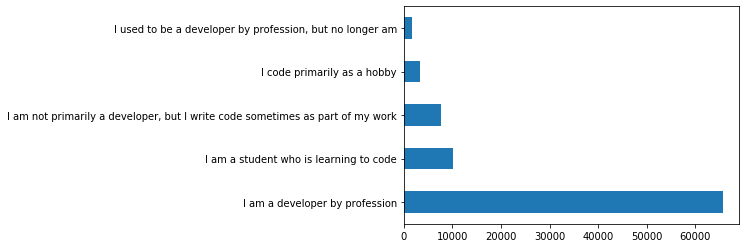

In [25]:
df['MainBranch'].value_counts().plot.barh()

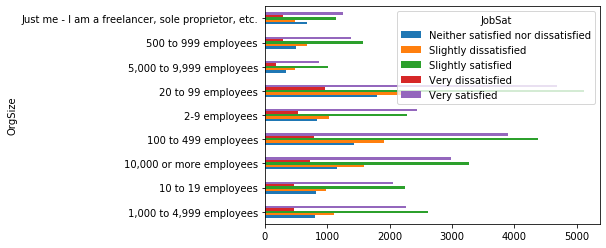

In [28]:
ct = pd.crosstab(df['OrgSize'], df['JobSat'])
ct.plot.barh()
plt.show()

### Cluster Analysis

In [163]:
df2 = df[['EdLevel', 'JobSat', 'Hobbyist']]
df2.shape

(88883, 3)

In [164]:
df2 = df2.dropna()
df2.shape

(69735, 3)

In [165]:
df2 = pd.get_dummies(data=df2, drop_first=True)
df2.head()

,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,JobSat_Slightly dissatisfied,JobSat_Slightly satisfied,JobSat_Very dissatisfied,JobSat_Very satisfied,Hobbyist_Yes
2,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,0,0,0,1,0,0,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
km = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
cluster_labels = km.fit_predict(df2)
df2['cluster'] = cluster_labels
df2.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 118784.0


,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,JobSat_Slightly dissatisfied,JobSat_Slightly satisfied,JobSat_Very dissatisfied,JobSat_Very satisfied,Hobbyist_Yes,cluster
2,1,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,1,0,0,1,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [167]:
df2.groupby(["cluster"]).describe()

EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)                      \
                                                   count      mean       std   
cluster                                                                        
0        50558.0                                          0.346315  0.475800   
1        19177.0                                          0.875632  0.330009   

                                  \
         min  25%  50%  75%  max   
cluster                            
0        0.0  0.0  0.0  1.0  1.0   
1        0.0  1.0  1.0  1.0  1.0   

        EdLevel_I never completed any formal education                      \
                                                 count      mean       std   
cluster                                                                      
0        50558.0                                        0.006290  0.079059   
1        19177.0                                        0.000574  0.023944   

                                  \
         min  25%  50%  75%  max   
cluster                            
0        0.0  0.0  0.0  0.0  1.0   
1        0.0  0.0  0.0  0.0  1.0   

        EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)            \
                                                      count      mean   
cluster                                                                 
0        50558.0                                             0.324281   
1        19177.0                                             0.072848   

                                            \
              std  min  25%  50%  75%  max   
cluster                                      
0        0.468110  0.0  0.0  0.0  1.0  1.0   
1        0.259893  0.0  0.0  0.0  0.0  1.0   

        EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)                      \
                                                    count      mean       std   
cluster                                                                         
0        50558.0                                           0.040053  0.196086   
1        19177.0                                           0.007509  0.086331   

                                 EdLevel_Primary/elementary school            \
         min  25%  50%  75%  max                             count      mean   
cluster                                                                        
0        0.0  0.0  0.0  0.0  1.0  50558.0                           0.006804   
1        0.0  0.0  0.0  0.0  1.0  19177.0                           0.000886   

                                            \
              std  min  25%  50%  75%  max   
cluster                                      
0        0.082206  0.0  0.0  0.0  0.0  1.0   
1        0.029761  0.0  0.0  0.0  0.0  1.0   

        EdLevel_Professional degree (JD, MD, etc.)                           \
                                             count      mean       std  min   
cluster                                                                       
0        50558.0                                    0.018533  0.134870  0.0   
1        19177.0                                    0.002972  0.054439  0.0   

                             \
         25%  50%  75%  max   
cluster                       
0        0.0  0.0  0.0  1.0   
1        0.0  0.0  0.0  1.0   

        EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)  \
                                                                                             count   
cluster                                                                                              
0        50558.0                                                                                     
1        19177.0                                                                                     

                                                      \
             mean       std  min  25%  50%  75%  max   
cluster                                     

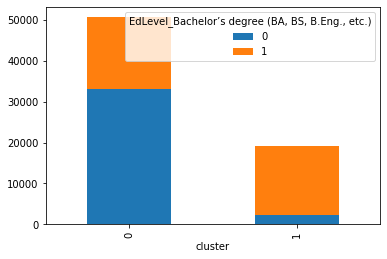

In [168]:
ct = pd.crosstab(df2['cluster'], df2['EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)'])
ct.plot.bar(stacked=True)
plt.show()

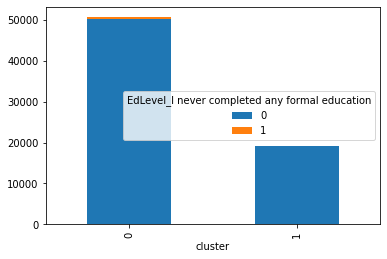

In [169]:
ct = pd.crosstab(df2['cluster'], df2['EdLevel_I never completed any formal education'])
ct.plot.bar(stacked=True)
plt.show()

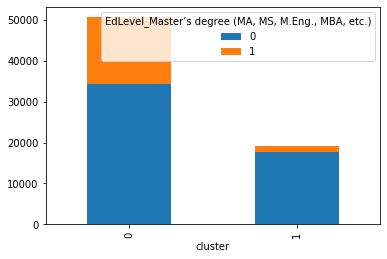

In [170]:
ct = pd.crosstab(df2['cluster'], df2['EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)'])
ct.plot.bar(stacked=True)
plt.show()

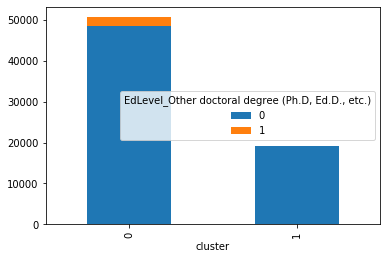

In [171]:
ct = pd.crosstab(df2['cluster'], df2['EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)'])
ct.plot.bar(stacked=True)
plt.show()

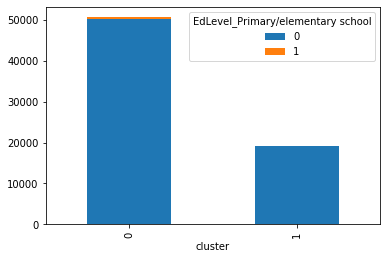

In [172]:
ct = pd.crosstab(df2['cluster'], df2['EdLevel_Primary/elementary school'])
ct.plot.bar(stacked=True)
plt.show()

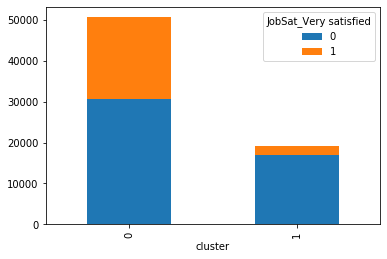

In [173]:
ct = pd.crosstab(df2['cluster'], df2['JobSat_Very satisfied'])
ct.plot.bar(stacked=True)
plt.show()

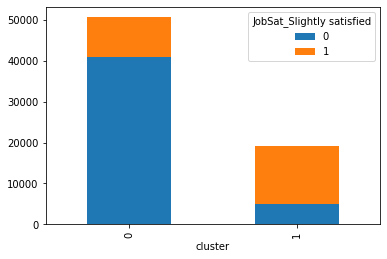

In [174]:
ct = pd.crosstab(df2['cluster'], df2['JobSat_Slightly satisfied'])
ct.plot.bar(stacked=True)
plt.show()

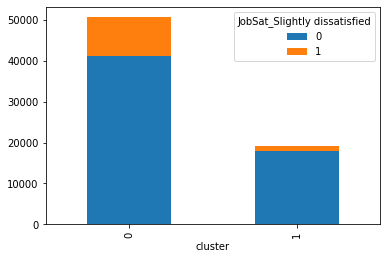

In [175]:
ct = pd.crosstab(df2['cluster'], df2['JobSat_Slightly dissatisfied'])
ct.plot.bar(stacked=True)
plt.show()

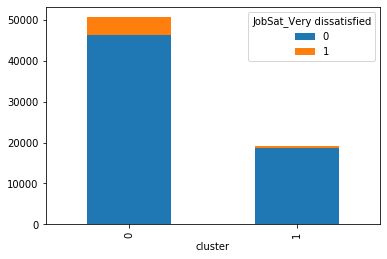

In [176]:
ct = pd.crosstab(df2['cluster'], df2['JobSat_Very dissatisfied'])
ct.plot.bar(stacked=True)
plt.show()

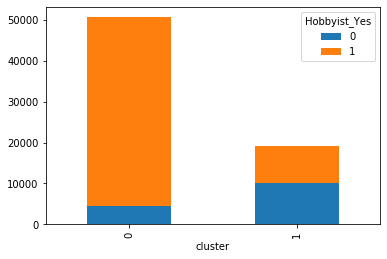

In [177]:
ct = pd.crosstab(df2['cluster'], df2['Hobbyist_Yes'])
ct.plot.bar(stacked=True)
plt.show()

### Regression Analysis

Dependent variable: ConvertedComp

Independent variables: MainBranch, EdLevel, YearsCode, YearsCodePro, FizzBuzz, MgrIdiot, WorkWeekHrs, WorkRemote, CodeRev, UnitTests, OpSys, OffOn, Extraversion, Age, Gender, Hobbyist, OpenSourcer	

In [260]:
df3 = df.dropna()
X = df3[["MainBranch", "EdLevel", "YearsCode", "YearsCodePro", "FizzBuzz", "MgrIdiot", "WorkWeekHrs", "WorkRemote", "CodeRev", "UnitTests", "OpSys", "OffOn", "Extraversion", "Age", "Gender", "Hobbyist", "OpenSourcer"]]
Y = df3["ConvertedComp"]
X.head()

,MainBranch,EdLevel,YearsCode,YearsCodePro,FizzBuzz,MgrIdiot,WorkWeekHrs,WorkRemote,CodeRev,UnitTests,OpSys,OffOn,Extraversion,Age,Gender,Hobbyist,OpenSourcer
19,"I am not primarily a developer, but I write code sometimes as part of my work","Master’s degree (MA, MS, M.Eng., MBA, etc.)",8,4,No,Very confident,140.0,"More than half, but not all, the time","Yes, because I see value in code review","No, but I think we should",Windows,Yes,In real life (in person),38.0,Man,No,Never
38,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",30,23,No,Somewhat confident,50.0,Less than once per month / Never,"Yes, because I see value in code review","Yes, it's part of our process",Windows,Yes,Online,42.0,Man,Yes,Less than once per year
43,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",26,19,No,Not at all confident,39.0,Less than once per month / Never,"Yes, because I see value in code review","Yes, it's part of our process",Windows,Yes,In real life (in person),43.0,Man,Yes,Once a month or more often
82,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",2,Less than 1 year,Yes,Somewhat confident,45.0,Less than once per month / Never,"Yes, because I see value in code review","Yes, it's part of our process",MacOS,What?,Online,22.0,Man,Yes,Less than once a month but more than once per year
103,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",7,7,No,Somewhat confident,6.0,A few days each month,"Yes, because I see value in code review","No, but I think we should",Windows,What?,Online,29.0,Man,Yes,Never


In [261]:
X.shape

(3475, 17)

In [262]:
X = sm.add_constant(X)

In [263]:
X_recoded = pd.get_dummies(data=X, columns=["MainBranch", "EdLevel", "FizzBuzz", "MgrIdiot", "WorkRemote", "CodeRev", "UnitTests", "OpSys", "OffOn", "Extraversion", "Gender", "Hobbyist", "OpenSourcer"], drop_first=True)
X_recoded.head()

,const,YearsCode,YearsCodePro,WorkWeekHrs,Age,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work","EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)","EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)","EdLevel_Professional degree (JD, MD, etc.)",EdLevel_Some college/university study without earning a degree,FizzBuzz_Yes,MgrIdiot_Not at all confident,MgrIdiot_Somewhat confident,MgrIdiot_Very confident,WorkRemote_About half the time,WorkRemote_All or almost all the time (I'm full-time remote),WorkRemote_It's complicated,"WorkRemote_Less than half the time, but at least one day each week",WorkRemote_Less than once per month / Never,"WorkRemote_More than half, but not all, the time","CodeRev_Yes, because I was told to do so","UnitTests_No, but I think we should","UnitTests_Yes, it's not part of our process but the developers do it on their own","UnitTests_Yes, it's part of our process",OpSys_Linux-based,OpSys_MacOS,OpSys_Windows,OffOn_What?,OffOn_Yes,Extraversion_Neither,Extraversion_Online,"Gender_Man;Non-binary, genderqueer, or gender non-conforming","Gender_Non-binary, genderqueer, or gender non-conforming",Gender_Woman,Gender_Woman;Man,Hobbyist_Yes,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often
19,1.0,8,4,140.0,38.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
38,1.0,30,23,50.0,42.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
43,1.0,26,19,39.0,43.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
82,1.0,2,Less than 1 year,45.0,22.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
103,1.0,7,7,6.0,29.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0


In [265]:
X_recoded.loc[X_recoded.YearsCode == "Less than 1 year", "YearsCode"] = 0
X_recoded.loc[X_recoded.YearsCodePro == "Less than 1 year", "YearsCodePro"] = 0
X_recoded["YearsCode"] = X_recoded["YearsCode"].astype(float)
X_recoded["YearsCodePro"] = X_recoded["YearsCodePro"].astype(float)

In [266]:
model = sm.OLS(Y, X_recoded).fit()
predictions = model.predict(X_recoded)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ConvertedComp   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.898
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.96e-09
Time:                        02:32:10   Log-Likelihood:                -48591.
No. Observations:                3475   AIC:                         9.726e+04
Df Residuals:                    3435   BIC:                         9.751e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    -1.084e+05   2.96e+05     -0.366      0.714   -6.89e+05    4.72e+05
YearsCode                                                                                 -928.2588   1360.957     -0.682      0.495   -3596.626    1740.109
YearsCodePro                                                                               627.4443   1949.474      0.322      0.748   -3194.802    4449.691
WorkWeekHrs                                                                                697.3080    233.901      2.981      0.003     238.709    1155.907
Age                                                                                       3827.0154   1460.383      2.621      0.009     963.709    6690.322
MainBranch_I am not primarily a developer, but I write code sometimes as part of my work  1.284e+04   2.73e+04      0.470      0.638   -4.07e+04    6.64e+04
EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)                                         -1.056e+04   2.52e+04     -0.419      0.676      -6e+04    3.89e+04
EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)                                      -2.114e+04   2.65e+04     -0.797      0.426   -7.32e+04    3.09e+04
EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)                                         7464.6972   4.92e+04      0.152      0.879    -8.9e+04    1.04e+05
EdLevel_Professional degree (JD, MD, etc.)                                               -6.496e+04   4.85e+04     -1.339      0.181    -1.6e+05    3.02e+04
EdLevel_Some college/university study without earning a degree                           -1.521e+04   2.79e+04     -0.545      0.586   -6.99e+04    3.95e+04
FizzBuzz_Yes                                                                              5.348e+04   1.23e+04      4.358      0.000    2.94e+04    7.75e+04
MgrIdiot_Not at all confident                                                             1632.4201   3.44e+04      0.048      0.962   -6.57e+04     6.9e+04
MgrIdiot_Somewhat confident                                                              -1.128e+04   3.28e+04     -0.344      0.731   -7.56e+04    5.31e+04
MgrIdiot_Very confident                                                                   4217.6675   3.29e+04      0.128      0.898   -6.03e+04    6.88e+04
WorkRemote_About half the time                                                            5.343e+04   3.29e+04      1.626      0.104    -1.1e+04    1.18e+05
WorkRemote_All or almost all the time (I'm full-time remote)                             -1.567e+04 

The model is statistically significant, because Prob (F-statistic) = 0
But the model describes only 3.2% of compensation variation, which means, that lots of factors remain unreavealed by this survey.

Statistically significant at 5% level are variables:
* WorkWeekHrs	
* Age
* FizzBuzz_Yes
* OpenSourcer_Less than once per year

All of them have positive correlation with compensation, which means, that higher salary have developers, who work a lot, are experienced and have at least once solved "FizzBuzz" quistion:) 
Also, commiting to opensource less than once a year have a positive impact on salary. Maybe, it's because those developers still have opensource projects in their CVs, but do not spend much time on them, concentrating on their work instead.



### Factor Analysis

In [4]:
df4 = df.dropna()
df4.shape

(3475, 85)

In [6]:
df4_recoded = pd.get_dummies(data=df4, drop_first=True)
df4_recoded.head()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",Hobbyist_Yes,OpenSourcer_Less than once per year,OpenSourcer_Never,...,Ethnicity_South Asian;White or of European descent,Ethnicity_South Asian;White or of European descent;Multiracial,Ethnicity_White or of European descent,Ethnicity_White or of European descent;Biracial;Multiracial,Ethnicity_White or of European descent;Multiracial,Dependents_Yes,SurveyLength_Too long,SurveyLength_Too short,SurveyEase_Easy,SurveyEase_Neither easy nor difficult
19,20,3000.0,41244.0,140.0,1.0,38.0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
38,39,156000.0,156000.0,50.0,3.0,42.0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
43,44,6400.0,87996.0,39.0,10.0,43.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
82,83,700000.0,117540.0,45.0,5.0,22.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
103,104,155000.0,2169.0,6.0,4.0,29.0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [7]:
calculate_bartlett_sphericity(df4_recoded)

/Users/svetlana/opt/anaconda3/lib/python3.7/site-packages/factor_analyzer/factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(-inf, 0.0)

In [9]:
calculate_kmo(df4_recoded)

(array([nan, nan, nan, ..., nan, nan, nan]), nan)